In [59]:
#packages
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
"""functions used 
d - no. of cols (features)
n - number of rows
s - number of non-zero entries (to be varied)
"""
def sketch_matrix(m, n_columns, non_zero_entries):
    #matrix with all zero entries
    S = np.zeros((m, n_columns))
    scaling_factor = 1 / np.sqrt(non_zero_entries)
    #loop through each columns to edit the non zero entries in
    for col in range(n_columns):
        # Randomly select position of non_zero entries
        nz_positions = np.random.choice(m, non_zero_entries, replace=False)
        
        # Randomly assign values of either 1 or -1 to these positions
        values = np.random.choice([1, -1], non_zero_entries)* scaling_factor
        
        # Assign the values to the selected positions in the column
        for idx, value in zip(nz_positions, values):
            S[idx, col] = value
    
    return S

In [62]:
#function to find min max
def find_min_max(S, U):
    SU = S @ U
    smin = np.min(SU)
    smax = np.max(SU)
    return smin, smax

#svd of matrix
def compute_svd(matrix):
    # SVD computation only keep the singular values
    _, s, _ = np.linalg.svd(matrix, full_matrices=False)
    return np.min(s), np.max(s)

In [24]:
sketch_matrix(10,5,3)

array([[-0.57735027, -0.57735027, -0.57735027,  0.        ,  0.57735027],
       [ 0.        ,  0.        ,  0.57735027,  0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.57735027,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.57735027],
       [ 0.        ,  0.        , -0.57735027,  0.        ,  0.        ],
       [ 0.        , -0.57735027,  0.        ,  0.        ,  0.        ],
       [ 0.57735027,  0.        ,  0.        , -0.57735027,  0.        ],
       [-0.57735027,  0.        ,  0.        ,  0.        , -0.57735027]])

In [25]:
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000    
d = 100          
n_sketches = 20
m_values = list(range(100, 1001, 50))

#U matrix
U = np.random.randn(n_rows, d)
original_svd_min, original_svd_max = compute_svd(U)



In [26]:
#simulation
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results_df = pd.DataFrame(results)

In [27]:
results_df['min_svd_list_length'] = results_df['min_svd_list'].apply(len)
results_df

,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20
...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20


In [29]:

results_df

,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20,0.162248,64.842919
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20,0.222463,64.781029
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20,0.153589,63.797957
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20,0.155217,64.523346
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20,0.200453,64.044618
...,...,...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20,18.548268,45.831568
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20,18.619261,45.653267
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20,18.698198,45.833659
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20,18.772831,45.487632


In [31]:
results_df['max_min_ratio'] = results_df['avg_max_svd']/results_df['avg_min_svd']
results_df


,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20,0.162248,64.842919,399.654339
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20,0.222463,64.781029,291.199312
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20,0.153589,63.797957,415.380055
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20,0.155217,64.523346,415.697987
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20,0.200453,64.044618,319.499142
...,...,...,...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20,18.548268,45.831568,2.470935
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20,18.619261,45.653267,2.451938
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20,18.698198,45.833659,2.451234
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20,18.772831,45.487632,2.423057


In [32]:
results_df.to_csv("implementation results.csv", index=False)

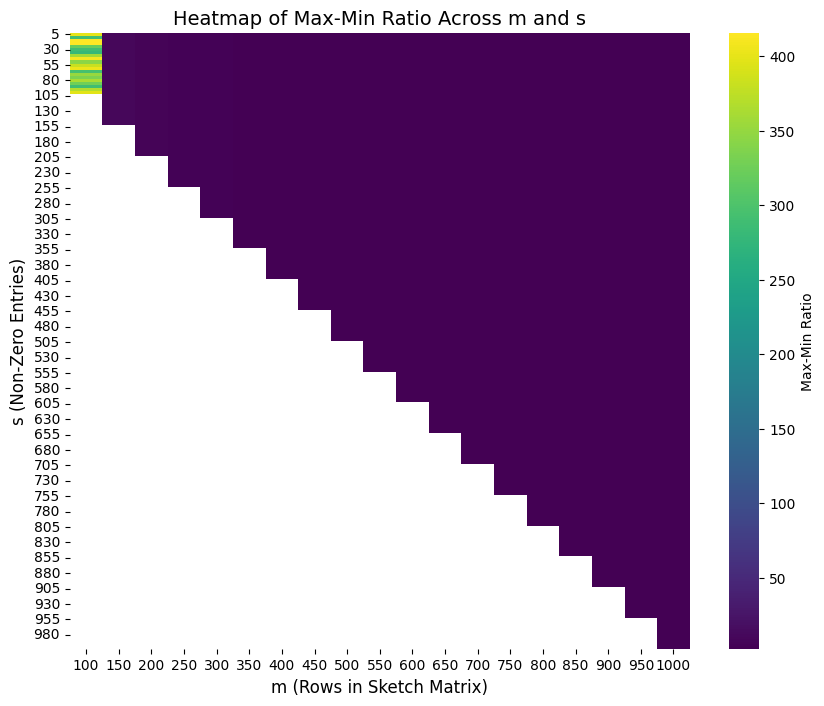

In [42]:
pivot_table = results_df.pivot(index="s", columns="m", values="max_min_ratio")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="viridis", annot=False, cbar_kws={"label": "Max-Min Ratio"})

plt.title("Heatmap of Max-Min Ratio Across m and s", fontsize=14)
plt.xlabel("m (Rows in Sketch Matrix)", fontsize=12)
plt.ylabel("s (Non-Zero Entries)", fontsize=12)

plt.show()

In [40]:
sorted_results = results_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results_cleaned = sorted_results.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows = sorted_results_cleaned.head(5)

top_few_rows

,m,s,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
2088,1000,995,0.261507,20,18.772831,45.487632,2.423057
1973,1000,420,0.154606,20,18.784610,45.525744,2.423566
2023,1000,670,0.206100,20,18.748343,45.549444,2.429518
1939,1000,250,0.120844,20,18.755563,45.574524,2.429920
1911,1000,110,0.097502,20,18.808409,45.727006,2.431200


In [44]:
#rows where s = m
temp = results_df[results_df["s"] == results_df["m"]]
temp = temp.drop(columns=["min_svd_list", "max_svd_list"])

temp

,m,s,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
19,100,100,0.046571,20,0.161748,64.346166,397.817427
49,150,150,0.070080,20,5.977589,59.066950,9.881400
89,200,200,0.081537,20,8.820922,56.407026,6.394686
139,250,250,0.094998,20,11.183144,53.883050,4.818238
199,300,300,0.108455,20,12.649263,52.263612,4.131752
269,350,350,0.122334,20,13.825524,51.261788,3.707764
349,400,400,0.134991,20,14.500955,50.501690,3.482646
439,450,450,0.143624,20,15.357429,49.550196,3.226464
539,500,500,0.169278,20,15.753423,48.801734,3.097849
649,550,550,0.165957,20,16.292950,48.456342,2.974068


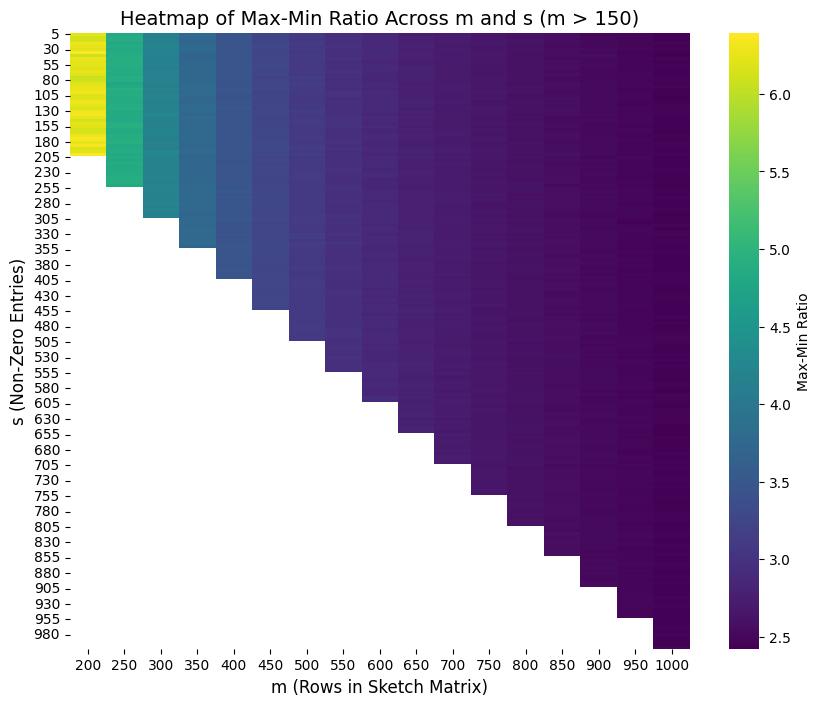

In [45]:
# Filter the results for m > 150
filtered_results_df = results_df[results_df['m'] > 150]

# Create the pivot table based on the filtered results
pivot_table_filtered = filtered_results_df.pivot(index="s", columns="m", values="max_min_ratio")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_filtered, cmap="viridis", annot=False, cbar_kws={"label": "Max-Min Ratio"})

plt.title("Heatmap of Max-Min Ratio Across m and s (m > 150)", fontsize=14)
plt.xlabel("m (Rows in Sketch Matrix)", fontsize=12)
plt.ylabel("s (Non-Zero Entries)", fontsize=12)

plt.show()


In [49]:
#simulation for U matrix with orthogonal columns
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000    
d = 100          
n_sketches = 20
m_values = list(range(100, 1001, 50))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix) 
original_svd_min, original_svd_max = compute_svd(U)

In [50]:
orthogonality_check = np.allclose(U.T @ U, np.eye(d))
orthogonality_check

True

In [51]:
#simulation for U with orthogonl matrix
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results2_df = pd.DataFrame(results)

In [52]:
results2_df.to_csv("implementation results2 orthogonal columns.csv", index=False)

In [53]:
results2_df

,m,s,min_svd_list,max_svd_list,avg_time
0,100,5,"[0.0016379128380206885, 0.0026012156171652417,...","[2.0005370247155865, 1.9932870004847085, 1.967...",0.063990
1,100,10,"[0.007772917462901248, 0.010607650957772871, 1...","[2.023539151558161, 1.93389694994069, 1.922914...",0.070264
2,100,15,"[0.00032703602118173855, 0.0036573426172732894...","[1.960376034690734, 2.009233841599933, 1.98387...",0.071904
3,100,20,"[0.014170505562135585, 0.0009217130841547507, ...","[1.9597291996640078, 1.8945002847731969, 1.974...",0.047944
4,100,25,"[0.002702522790162387, 0.018502783265737798, 0...","[1.9664501153185914, 1.9318289266624198, 1.934...",0.059425
...,...,...,...,...,...
2085,1000,980,"[0.6951822965126683, 0.6868372408469556, 0.689...","[1.3001677844643387, 1.3055265076595404, 1.309...",0.276503
2086,1000,985,"[0.6818234714392961, 0.6816137437322833, 0.698...","[1.2947007997764806, 1.2982839473230665, 1.312...",0.250831
2087,1000,990,"[0.6856173742755887, 0.6913129644368509, 0.700...","[1.309825886688543, 1.297809462247449, 1.29771...",0.260299
2088,1000,995,"[0.6948823017214759, 0.6974762162061034, 0.698...","[1.3015967411331586, 1.310378750160398, 1.3042...",0.258883


In [54]:
results2_df['avg_min_svd'] = results2_df['min_svd_list'].apply(np.mean)

# Calculate the average of the max_svd_list for each row
results2_df['avg_max_svd'] = results2_df['max_svd_list'].apply(np.mean)
results2_df['max_min_ratio'] = results2_df['avg_max_svd']/results2_df['avg_min_svd']
results2_df

,m,s,min_svd_list,max_svd_list,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
0,100,5,"[0.0016379128380206885, 0.0026012156171652417,...","[2.0005370247155865, 1.9932870004847085, 1.967...",0.063990,0.005839,1.973528,337.963828
1,100,10,"[0.007772917462901248, 0.010607650957772871, 1...","[2.023539151558161, 1.93389694994069, 1.922914...",0.070264,0.007291,1.963861,269.361176
2,100,15,"[0.00032703602118173855, 0.0036573426172732894...","[1.960376034690734, 2.009233841599933, 1.98387...",0.071904,0.005619,1.959900,348.803600
3,100,20,"[0.014170505562135585, 0.0009217130841547507, ...","[1.9597291996640078, 1.8945002847731969, 1.974...",0.047944,0.004185,1.945680,464.874502
4,100,25,"[0.002702522790162387, 0.018502783265737798, 0...","[1.9664501153185914, 1.9318289266624198, 1.934...",0.059425,0.007715,1.961850,254.288474
...,...,...,...,...,...,...,...,...
2085,1000,980,"[0.6951822965126683, 0.6868372408469556, 0.689...","[1.3001677844643387, 1.3055265076595404, 1.309...",0.276503,0.690172,1.307576,1.894565
2086,1000,985,"[0.6818234714392961, 0.6816137437322833, 0.698...","[1.2947007997764806, 1.2982839473230665, 1.312...",0.250831,0.692413,1.306515,1.886901
2087,1000,990,"[0.6856173742755887, 0.6913129644368509, 0.700...","[1.309825886688543, 1.297809462247449, 1.29771...",0.260299,0.689344,1.305767,1.894217
2088,1000,995,"[0.6948823017214759, 0.6974762162061034, 0.698...","[1.3015967411331586, 1.310378750160398, 1.3042...",0.258883,0.690246,1.306607,1.892958


In [55]:
sorted_results2 = results2_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results2_cleaned = sorted_results2.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows2 = sorted_results2_cleaned.head(5)

top_few_rows2

,m,s,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
1910,1000,105,0.095834,0.695978,1.299495,1.867151
2007,1000,590,0.184947,0.694069,1.299350,1.872077
1890,1000,5,0.074998,0.696619,1.304249,1.872254
2014,1000,625,0.189488,0.696483,1.304826,1.873450
1996,1000,535,0.171890,0.695266,1.302711,1.873688


In [64]:
#temp
#simulation for U matrix with orthogonal columns
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000  
d = 100      
n_sketches = 100
m_values = list(range(950, 1001, 50))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix)

#simulation for U with orthogonl matrix
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results3_df = pd.DataFrame(results)

In [65]:
results3_df

,m,s,min_svd_list,max_svd_list,avg_time
0,950,5,"[0.6866204534348547, 0.6938071896382982, 0.678...","[1.32325986685258, 1.3267431163370451, 1.33553...",0.070906
1,950,10,"[0.6959344349760921, 0.6880753978927218, 0.688...","[1.325328064582457, 1.308852109603231, 1.32727...",0.073166
2,950,15,"[0.6789295271690544, 0.6787661417036599, 0.681...","[1.3195867638051746, 1.3098372756428134, 1.296...",0.076167
3,950,20,"[0.6891753790369788, 0.679140913367249, 0.6893...","[1.3021321930165595, 1.3175733929063767, 1.300...",0.077333
4,950,25,"[0.6926649277033888, 0.6886170215603246, 0.679...","[1.3126536457718894, 1.304669687046633, 1.2930...",0.077335
...,...,...,...,...,...
385,1000,980,"[0.6888899593964558, 0.687903133792746, 0.7027...","[1.3022331485566736, 1.3107485171140585, 1.318...",0.269717
386,1000,985,"[0.696560607428636, 0.695993911237143, 0.68326...","[1.29766252866287, 1.302412680118383, 1.311767...",0.260144
387,1000,990,"[0.6906053186430916, 0.6919549581483665, 0.695...","[1.304273326429048, 1.3081497498206218, 1.2972...",0.262366
388,1000,995,"[0.7005667628880194, 0.6915283544396027, 0.695...","[1.3232863675378, 1.3108901445203713, 1.296625...",0.277833


In [66]:
results3_df['avg_min_svd'] = results3_df['min_svd_list'].apply(np.mean)

# Calculate the average of the max_svd_list for each row
results3_df['avg_max_svd'] = results3_df['max_svd_list'].apply(np.mean)
results3_df['max_min_ratio'] = results3_df['avg_max_svd']/results3_df['avg_min_svd']
sorted_results3 = results3_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results3_cleaned = sorted_results3.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows3 = sorted_results3_cleaned.head(5)

top_few_rows3

,m,s,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
314,1000,625,0.193940,0.693396,1.302879,1.878984
201,1000,60,0.084537,0.694203,1.304904,1.879716
221,1000,160,0.105529,0.693228,1.303073,1.879719
372,1000,915,0.249647,0.693872,1.304652,1.880248
352,1000,815,0.235075,0.693416,1.303797,1.880253


Trying with larger M values and smaller dimension

In [71]:
#temp
#simulation for U matrix with orthogonal columns
#initialise
#n_row is the row of U and dimension of S
n_rows = 2000
d = 10      
n_sketches = 20
m_values = list(range(1500, 2001, 50))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix)

#simulation for U with orthogonl matrix
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 50))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results4_df = pd.DataFrame(results)

In [72]:
results4_df['avg_min_svd'] = results4_df['min_svd_list'].apply(np.mean)

# Calculate the average of the max_svd_list for each row
results4_df['avg_max_svd'] = results4_df['max_svd_list'].apply(np.mean)
results4_df['max_min_ratio'] = results4_df['avg_max_svd']/results4_df['avg_min_svd']
sorted_results4 = results4_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results4_cleaned = sorted_results4.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows4 = sorted_results4_cleaned.head(5)

top_few_rows4

,m,s,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
362,2000,855,0.449987,0.943339,1.054432,1.117766
376,2000,1555,0.716602,0.943588,1.056498,1.119660
353,2000,405,0.278151,0.941497,1.055808,1.121415
375,2000,1505,0.736697,0.942833,1.057815,1.121953
384,2000,1955,0.865646,0.942737,1.057933,1.122194
